In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

In [2]:
RUNNING_AVG_WINDOW = 7

# https://stackoverflow.com/questions/13728392/moving-average-or-running-mean
def runningAvg(data):
    result = pd.DataFrame(np.convolve(data, np.ones((RUNNING_AVG_WINDOW,))/RUNNING_AVG_WINDOW, mode='valid'))
    return result[0]

In [3]:
data = pd.read_csv('covid.csv')
data['date'] = data['date'].apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%Y'))
data = data.sort_values('date').reset_index(drop=True)


<AxesSubplot: title={'center': 'Daily new cases'}, xlabel='days', ylabel='cases'>

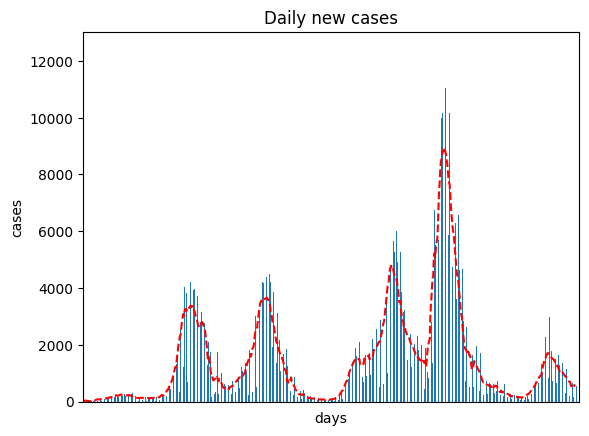

In [4]:
data['new_cases'].plot(kind='bar', xlabel='days', ylabel='cases', title='Daily new cases', xticks=range(500, 100))
runningAvg(data['new_cases']).plot(color='red', style='--', xticks=range(500, 100))

<AxesSubplot: title={'center': 'Daily new deaths'}, xlabel='days', ylabel='deaths'>

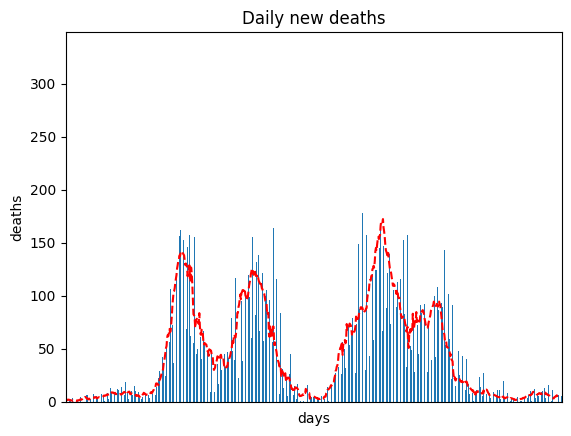

In [5]:
data['deaths'].plot(kind='bar', xlabel='days', ylabel='deaths', title='Daily new deaths', xticks=range(500, 100))
runningAvg(data['deaths']).plot(color='red', style='--', xticks=range(500, 100))

<AxesSubplot: title={'center': 'Deaths by age group'}, xlabel='age groups', ylabel='deaths'>

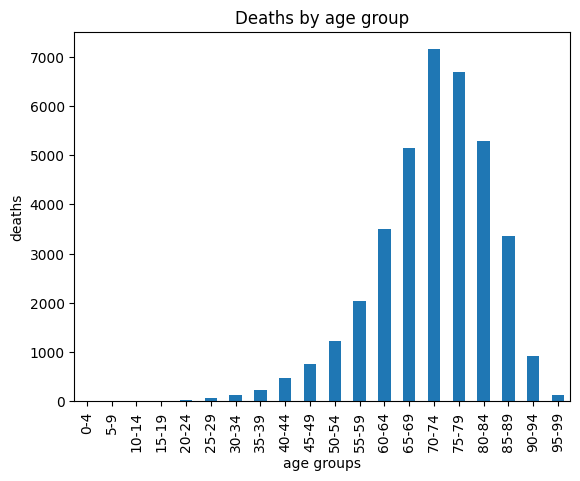

In [6]:
deathsByAge = data.drop(['source', 'date', 'new_cases', 'deaths'], axis = 1).sum()
deathsByAge.plot(kind='bar', title='Deaths by age group', xlabel='age groups', ylabel='deaths')